In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/Incomes/incomes.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


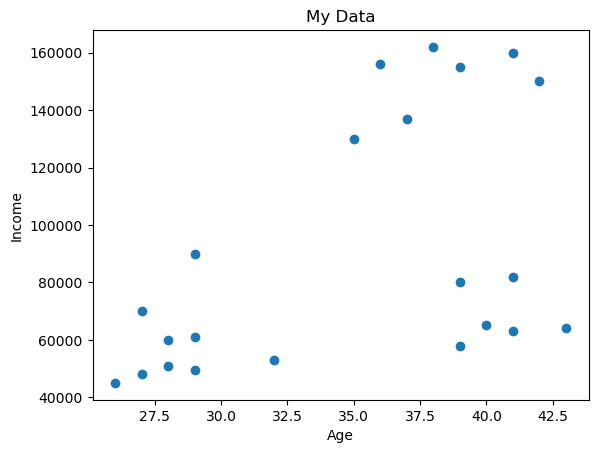

In [3]:
plt.scatter(df["Age"], df["Income"])
plt.title("My Data")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Income']])
df.Income = scaler.transform(df[['Income']])


scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417
5,Gautam,0.725332,1.519048
6,David,1.072230,1.636679
7,Andrea,0.551883,1.683732
8,Brad,0.204985,1.542574
9,Angelina,0.031536,0.930891


#### From the graph we can see that we have three clusters

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init="auto")
clusters = km.fit_predict(df[['Age', 'Income']])
clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [6]:
df['cluster_number'] = clusters
df

,Name,Age,Income,cluster_number
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,0
5,Gautam,0.725332,1.519048,0
6,David,1.072230,1.636679,0
7,Andrea,0.551883,1.683732,0
8,Brad,0.204985,1.542574,0
9,Angelina,0.031536,0.930891,0


In [7]:
centroid = km.cluster_centers_
centroid_x = centroid[:, 0]
centroid_y = centroid[:, 1]

print(centroid)
print('centroid x:', centroid_x)
print('centroid y:', centroid_y)

[[ 0.60143983  1.40141653]
 [-1.1247901  -0.74862223]
 [ 0.98550535 -0.51205261]]
centroid x: [ 0.60143983 -1.1247901   0.98550535]
centroid y: [ 1.40141653 -0.74862223 -0.51205261]


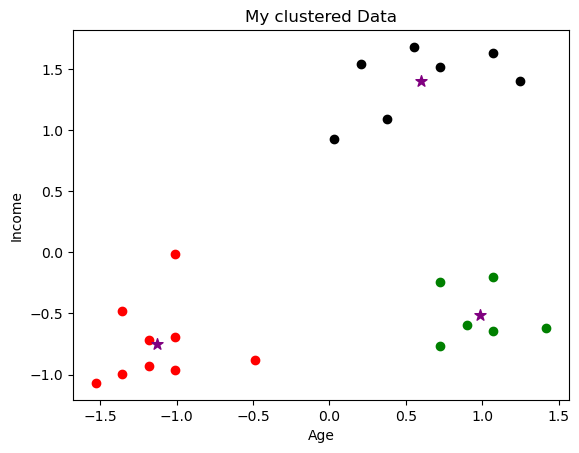

In [8]:
df1 = df[df["cluster_number"]==0]
df2 = df[df["cluster_number"]==1]
df3 = df[df["cluster_number"]==2]

plt.scatter(df1["Age"], df1["Income"], c="black")
plt.scatter(df2["Age"], df2["Income"], c="red")
plt.scatter(df3["Age"], df3["Income"], c="green")
plt.scatter(centroid_x, centroid_y, c="purple", marker="*", s=70)

plt.title("My clustered Data")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [9]:
km.inertia_

3.889308657130143

### Elbow plot 

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sse = []
clusters_range = range(1, 10)

for k in clusters_range:
    km_model = KMeans(n_clusters = k, n_init='auto')
    km_model.fit(df[['Age','Income']])
    sse.append(km_model.inertia_)

sse

[43.99999999999999,
 16.194890274706772,
 3.889308657130143,
 2.828763380093525,
 2.492079633553696,
 2.4158370870885526,
 1.588406528707545,
 1.3316272414368702,
 0.9950782336793318]

## 3 clusters is the best number of clusters

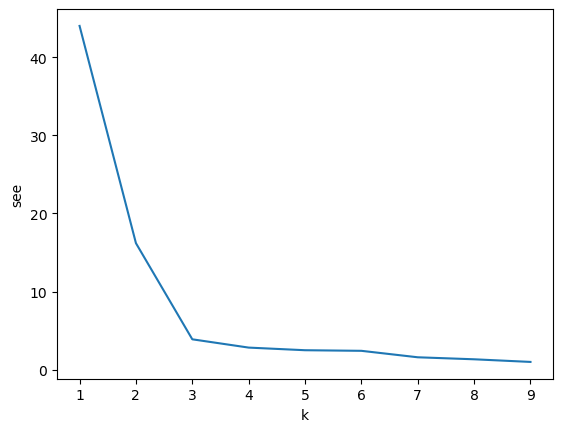

In [11]:
plt.plot(clusters_range, sse)
plt.xlabel('k')
plt.ylabel('see')
plt.show()

## or we can use the silhouette score

#### the silhouette score
The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn/sklearn library.

First, we calculate the mean intra-cluster distance for a given cluster. 
Let the value of mean intra-cluster distance be a.
Next, we calculate the mean nearest-cluster distance for a given cluster.
Here, the nearest cluster distance is calculated as the distance between a data point of the current cluster and the cluster that the data point is not a part of.  
Let the value of the mean nearest cluster distance be b.
The Silhouette Coefficient for a cluster is calculated as is (b – a) / max(a, b).

In [12]:
from sklearn.metrics import silhouette_score

list_of_silhouetescores = []
k_range = range(2, 10)
X = df[['Age','Income']]

for k in k_range:
    model = KMeans(n_clusters = k, n_init='auto')

    # Fit the model 
    model.fit(X) # calculate the centroids
    
    # add the silhouette_score to the list
    s_score = silhouette_score(X, model.labels_)
    
    list_of_silhouetescores.append(s_score)

list_of_silhouetescores

[0.5723194612553445,
 0.7119890290065082,
 0.5526608662443336,
 0.6167358186440123,
 0.46426191320484905,
 0.4566458869372194,
 0.3984307894635483,
 0.29203706904425863]

In [13]:
model.labels_

array([7, 4, 7, 7, 3, 6, 3, 6, 0, 0, 0, 1, 1, 1, 1, 5, 2, 2, 2, 8, 8, 2])

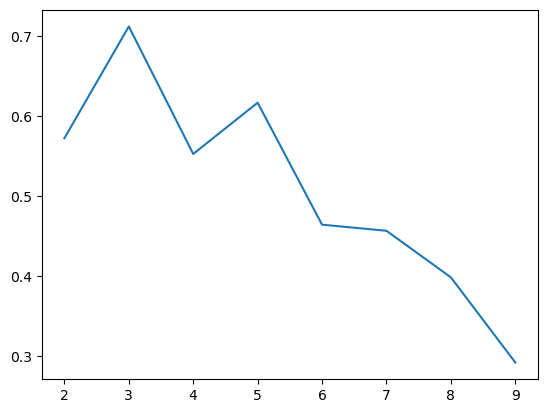

In [14]:
plt.plot(k_range, list_of_silhouetescores)

`! pip install yellowbrick`

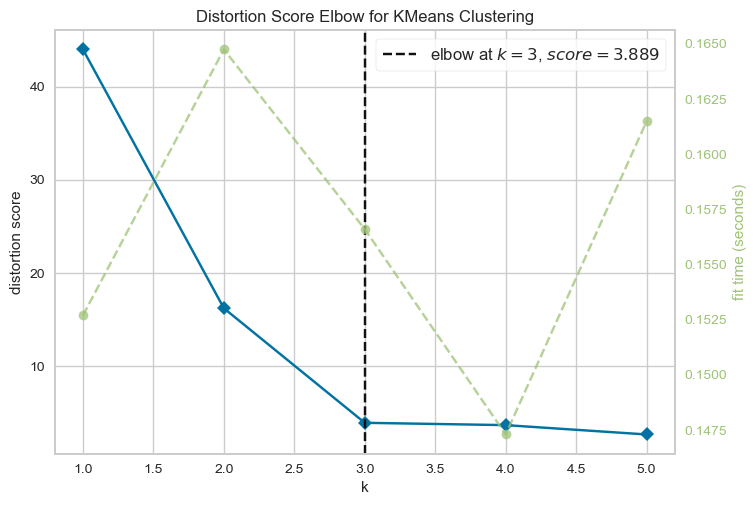

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import  KElbowVisualizer

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k = (1, 6))

visualizer.fit(df[['Age','Income']])
visualizer.show()